#
# **Resolvendo a Equação do Movimento para massas em anel**
#### Aluna: Isabela B. Beneti- 220039
#### Disciplina: Dinâmica Avançada
#### Prof. Felipe Crasto
---



## Importações

In [78]:
# bibliotecas importanttes para a resolução do problema
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, diff, Rational, sqrt, cos, sin, pi, solve
from sympy.solvers.ode.systems import dsolve_system
import sympy.physics.mechanics as mech
mech.init_vprinting()
from math import radians

---
## 1. Introdução
No presente notebook, busco deifnir a equação do movimento para duas massas com cargas presas num anel fixo na direção horizontal, acopladas por uma mola e sob ação de campos gravitacional e elétrico, além de plotar o gráfico de seus movimentos e interpretá-los. Para tanto, é necessário utilizar os conceitos aprendidos em dinâmica avançada e aplicá-los utilizando a biblioteca sympy do python. A biblioteca será utilizada apenas para a realização dos cálculos, que são extensos, mas, para chegar até eles, é necessário primeiramente definir os parâmetros e as fórmulas das energias cinéticas e potenciais.



---
## 2. Metodologia

Como comentado, o que buscamos é a definição da equação do movimento desse sistema e a posterior plotagem dos gráficos do movimento. Vimos em sala de aula que, embora a segunda lei de Newton seja uma aproximação adequada para lidarmos com muitos problemas da dinâmica clássica, essa equação se mostra limitada para lidarmos com problemas como os de massa-mola, sendo necessário utilizar a **Lagrangiana**, que se trata basicamente da subtração energia cinética (T) por todas as energias potenciais (V) do sistema, ou seja:

$$ L= T - V $$



### 2.1 Energia Cinética
No nosso sistema, usaremos apenas uma fórmula para definir a energia cinética: sendo $m_1$ a massa 1, $m_2$ a massa 2 e $x_1$ e $x_2$ suas respectivas posições

$$T = \frac{1}{2} m_1 \dot{x}_1^2 + \frac{1}{2} m_2 \dot{x}_2^2$$

sendo que $\dot{x}_1^2$ e $\dot{x}_2^2$ representam as derivadas da posição e, isto é, a velocidade das massas 1 e 2 respectivamente. É importante ressaltar que, como o sistema está preso a um anel de raio $R$, trabalharei com coordenadas esféricas, que são dadas em função de $\theta$ e de $r$, pois isso facilita o cálculo.



In [212]:
# Definindo os primeiros parâmetros, para escrever a equação de energia cinética
t = symbols('t', real=True)
m_1, m_2 = symbols('m_1 m_2', positive=True)
R = symbols('R', positive=True)
x_1 = Function('x_1')(t)
x_2 = Function('x_2')(t)
theta_1 = Function('theta_1')(t)
theta_2 = Function('theta_2')(t)

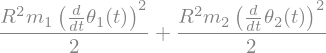

In [213]:
T = Rational(1, 2) * m_1 * (R ** 2 * (theta_1.diff(t))**2) + Rational(1, 2) * m_2 * (R ** 2 * (theta_2.diff(t))**2)
display(T)

### 2.2 Energia Potencial

Já para a energia potencial, será necessário realizar a somatória de 4 energias para chegar ao valor de $V$.

$$ V= E_{pot elástica} + E_{pot gravitcional}+ E_{pot elétrica} + E_{pot campo elétrico}$$

#### 2.21 Energia Potencial Elástica

Primeiramente, é preciso calcular a **_energia potencial elástica_** existente devido à presença da mola pela fórmula

$$E_{elástica}= \frac{k*x^2}{2}$$

tendo $k$ como constante elástica e $x$ como a deformação da mola. Logo, $x$ será dado por $x_1 - x_2$.


In [214]:
k= symbols('k', positive=True)

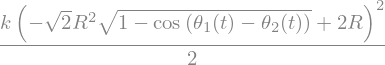

In [215]:
U = sqrt(2) * R**2 * sqrt(1 - cos(theta_1 - theta_2))
Eelastica = Rational(1, 2) * k * (2 * R - U)**2
display(Eelastica)

#### 2.22 Energia Potencial Gravitacional

Além disso, também é necessário considerar a **_energia potencial gravitacional_** das massas, que pode ser calculada por:

$$E_{pot gravitacional}= g* h$$

Portanto, sendo $Rsin(theta)$ a altura da partícula, temos:

In [216]:
g= symbols('g', positive=True)

In [217]:
Egravitacional = m_1 * g * R * sin(theta_1) + m_2 * g * R * sin(theta_2) #Rsin(theta) é a altura da partícula
display(Egravitacional)

#### 2.23 Energia Potencial Elétrica

Das interações entre as cargas das massas também surge a energia potencial elétrica entre as cargas. Definindo as cargas de $m_1$ e de $m_2$ como $q_1$ e $q_2$, temos que essa energia pode ser calculada pela fórmula:

In [218]:
q_1, q_2, e0 = symbols('q_1 q_2 e0')

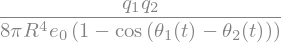

In [219]:
Eeletrica = Rational(1, 4) * (1 / (pi * e0)) * (q_1 * q_2) / U ** 2
display(Eeletrica)

#### 2.24 Energia Potencial do Campo Elétrico

Das interações edas cargas das massas com o campo elétrico $E$  a energia potencial do campo elétrico. Definindo as cargas de $m_1$ e de $m_2$ como $q_1$ e $q_2$, temos que essa energia pode ser calculada pela fórmula:

$$ E_{pot do campo elétrico}= E * q$$

In [220]:
E_x, E_y= symbols('E_x E_y', real = True)

In [221]:
Ecampoeletrico = E_x * q_1 * R * cos(theta_1) + E_y * q_1 * R * sin(theta_1) + E_x * q_2 * R * cos(theta_2) + E_y * q_2 * R * sin(theta_2)
display(Ecampoeletrico)

#### 2.25 Energia Potencial Total

Por fim, basta apenas somar todas as energias potenciais calculadas para obter a energia potencial total $V$

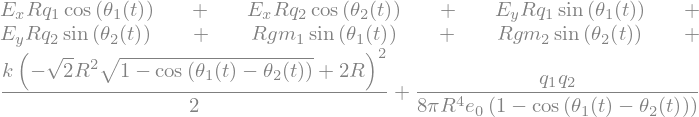

In [222]:
E_pot_total= Eelastica+ Egravitacional+ Eeletrica+ Ecampoeletrico
display(E_pot_total)

### 2.3 Lagrangiana

Finalmente, chegamos à Lagrangiana subtraindo a energia cinética pela energia potencial total:

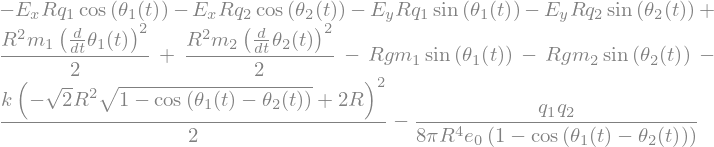

In [223]:
L = T - E_pot_total
display(L) 

### 2.4 Equação de Euler-Lagrange

Por fim, para chegarmos, de fato, à equação do movimento, basta aplicar a lagrangiana encontrada à equação de Euler-Lagrange, dada abaixo:
$$      \frac{d}{dt}\left(\frac{\partial L}{\partial \dot{x}}\right) - \frac{\partial L}{\partial x} = 0 $$

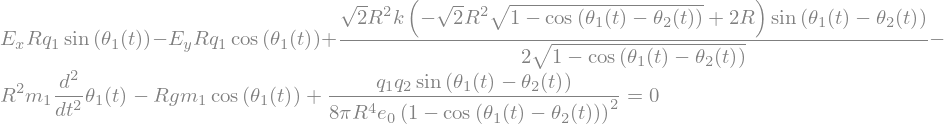

In [224]:
Movt1 = Eq(L.diff(theta_1) - L.diff(diff(theta_1, t)).diff(t), 0) 
display(Movt1)


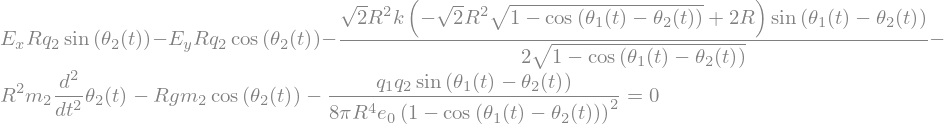

In [225]:
Movt2 = Eq(L.diff(theta_2) - L.diff(diff(theta_2, t)).diff(t), 0)
display(Movt2)

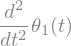

In [226]:
ddtheta1 = diff(diff(theta_1, t), t) #Derivada dupla de theta 1
display(ddtheta1)

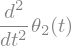

In [227]:
ddtheta2 = diff(diff(theta_2, t), t) #Derivada dupla de theta 2
display(ddtheta2)

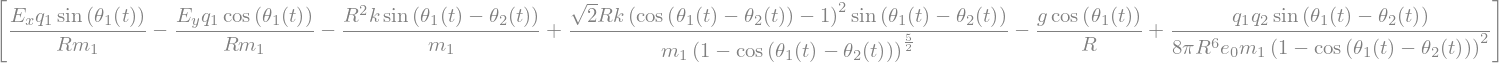

In [228]:
ddtheta1 = solve(Movt1, ddtheta1)
display(ddtheta1)

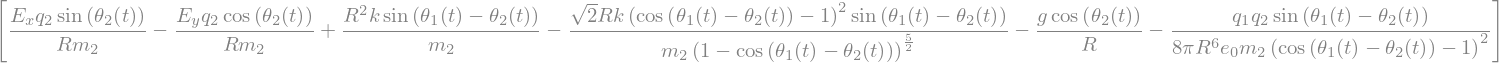

In [229]:
ddtheta2 = solve(Movt2, ddtheta2)
display(ddtheta2)

---
## 3. Representação Gráfica

Para plotar os gráficos, é necessário primeiro definir o valor dos parâmetros. Inicialmente, vou utilizar valores "aleatórios", mas depois vou mudar os valores desses parâmetros e observar como eles afetam o comportamento do gráfico

In [230]:
#Cargas iguais (mesma intensidade e mesmo sinal)
q1 = 1*10**(-5)
q2 = 1*10**(-5)

#Campo
Ex = 1
Ey = 1

#Massas: massas iguais
m1 = 0.5
m2 = 0.5

#Constantes 
g_ = 10
R_ = 2
k_= -2
e0=8.854*10**(-12)


In [231]:
def ddtheta1(theta1, theta2):
    R = R_
    k = k_
    g = g_
    ddtheta1 = Ex*q1*np.sin(theta1)/(R*m1) - Ey*q1*np.cos(theta1)/(R*m1) - R**2 * k *np.sin(theta1 - theta2)/m1 + (np.sqrt(2) * R*k * (1-np.cos(theta2-theta2))**(3/2) * np.sin(theta1-theta2))/(m1*(np.cos(theta1-theta2)-1))**2 + g*np.cos(theta1)/R + q1*q2*np.sqrt(2-2*np.cos(theta1 - theta2)) *np.sin(theta1-theta2)/(16*R**4*e0*m1*np.pi*(np.cos(theta1-theta2)-1)**2)
    return ddtheta1

def ddtheta2(theta1, theta2):
    R = R_
    k = k_
    g = g_
    ddtheta2 = Ex*q2*np.sin(theta2)/(R*m2) - Ey*q2*np.cos(theta2)/(R*m2) + R**2 * k *np.sin(theta1 - theta2)/m2 - (np.sqrt(2) * R*k * (1-np.cos(theta2-theta2))**(3/2) * np.sin(theta1-theta2))/(m2*(np.cos(theta1-theta2)-1))**2 + g*np.cos(theta2)/R - q1*q2*np.sqrt(2-2*np.cos(theta1 - theta2)) *np.sin(theta1-theta2)/(16*R**4*e0*m2*np.pi*(np.cos(theta1-theta2)-1)**2)
    return ddtheta2

In [232]:
N = 1000 #Passos
T = 50 #Tempo
dt = T/N

ti = np.zeros(N+1)
the1 = np.zeros(N+1)
thed1 = np.zeros(N+1)
the2 = np.zeros(N+1)
thed2 = np.zeros(N+1)

the1[0] = radians(30) #ângulo inicial da massa 1
the2[0] = np.pi + radians(30) # ângulo inicial da massa 2
thed1[0] = 0
thed2[0] = 0

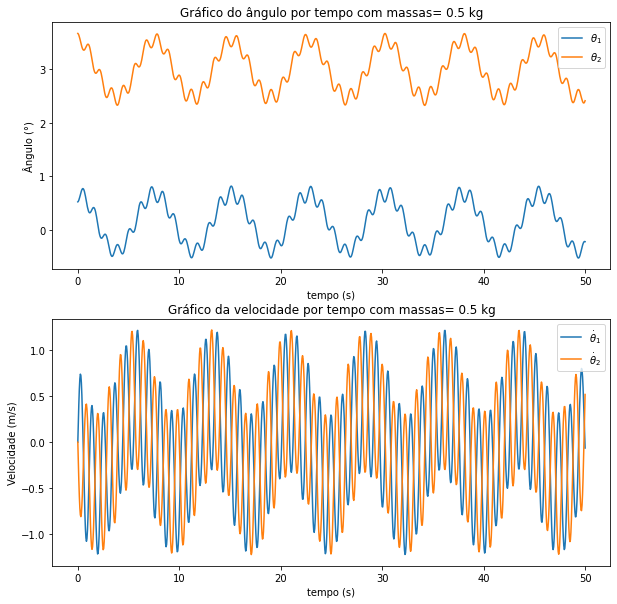

In [233]:
for n in range(N): 

    ti[n+1] = ti[n] + dt
    thed1[n+1] = thed1[n] + dt*(ddtheta1(the1[n], the2[n]))
    the1[n+1] = the1[n] + dt*thed1[n+1]
    thed2[n+1] = thed2[n] + dt*(ddtheta2(the1[n], the2[n]))
    the2[n+1] = the2[n] + dt*thed2[n+1]

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,10))

ax[0].plot(ti, the1,'-',label=r'$\theta_1$')
ax[0].plot(ti, the2,'-',label=r'$\theta_2$')
ax[0].legend(loc="upper right")
ax[0].set_ylabel('Ângulo (°)')
ax[0].set_xlabel('tempo (s)')
ax[0].set_title('Gráfico do ângulo por tempo com massas= 0.5 kg')

ax[1].plot(ti,thed1,'-',label=r'$\dot{\theta}_1$')
ax[1].plot(ti,thed2,'-',label=r'$\dot{\theta}_2$')
ax[1].legend(loc="upper right")
ax[1].set_ylabel('Velocidade (m/s)')
ax[1].set_xlabel('tempo (s)')
ax[1].set_title('Gráfico da velocidade por tempo com massas= 0.5 kg')

plt.show()

In [234]:
#### DIMINUINDO O VALOR DA MASSA
#Cargas iguais (mesma intensidade e mesmo sinal)
q1 = 2*10**(-5)
q2 = -2*10**(-5)

#Campo
Ex = 1
Ey = 1

#Massas: massas iguais
m1 = 0.1
m2 = 0.1

#Constantes 
g_ = 0.5
R_ = 1
k_= -2
e0=8.854*10**(-12)

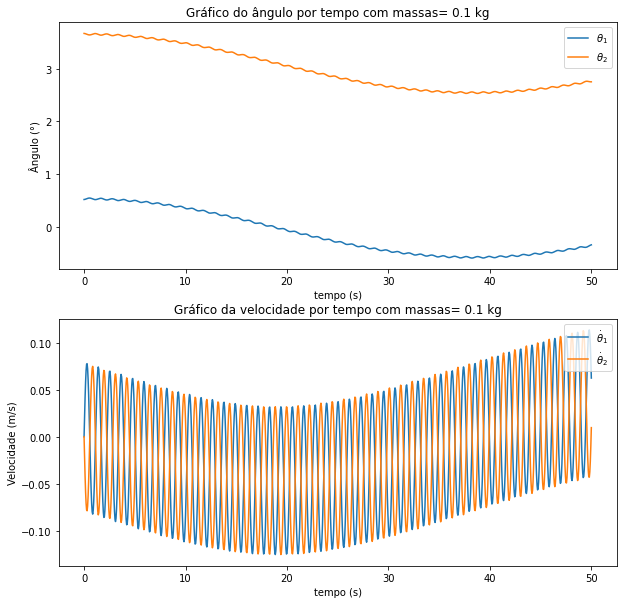

In [235]:
for n in range(N): 

    ti[n+1] = ti[n] + dt
    thed1[n+1] = thed1[n] + dt*(ddtheta1(the1[n], the2[n]))
    the1[n+1] = the1[n] + dt*thed1[n+1]
    thed2[n+1] = thed2[n] + dt*(ddtheta2(the1[n], the2[n]))
    the2[n+1] = the2[n] + dt*thed2[n+1]

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,10))

ax[0].plot(ti, the1,'-',label=r'$\theta_1$')
ax[0].plot(ti, the2,'-',label=r'$\theta_2$')
ax[0].legend(loc="upper right")
ax[0].set_ylabel('Ângulo (°)')
ax[0].set_xlabel('tempo (s)')
ax[0].set_title('Gráfico do ângulo por tempo com massas= 0.1 kg')


ax[1].plot(ti,thed1,'-',label=r'$\dot{\theta}_1$')
ax[1].plot(ti,thed2,'-',label=r'$\dot{\theta}_2$')
ax[1].legend(loc="upper right")
ax[1].set_ylabel('Velocidade (m/s)')
ax[1].set_xlabel('tempo (s)')
ax[1].set_title('Gráfico da velocidade por tempo com massas= 0.1 kg')
plt.show()

## 4. Conclusões

Pelo o que podemos analisar pelo gráfico, o sistema de duas massas apresenta um comportamente periódico, o que se deve à presença de funções periódicas como seno e cosseno na sua equação de movimento. 

O gráfico plotado se trata de uma "senoidal de senoidais", isso por que o campo gravitacional leva as partículas a se comportarem de maneira periódica, mas a presença da mola impede que também gera outro comportamento periódico, levando ao desenho que observamos nos gráfico de ângulo por tempo. 

Além disso, quando aumentamos o valor das massas, percebe-se o aumento do período dessa senoide, o que faz sentido quando analisamos a equação de movimento do sistema, em que as massas se encontram no denominador e, por isso, são inversamente proporcionais à frequência do movimento (quanto maior a massa, menor a frequência).